# Deep learning framework example: MNIST dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.


**Important**: Please see the Iris notebook example first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
import sys
import logging
from zensols.config import ExtendedInterpolationEnvConfig as AppConfig
from zensols.config import ImportConfigFactory
from zensols.deeplearn.result import ModelResultGrapher
from zensols.deeplearn import TorchConfig

# set up notebook environment
app_root_dir = '..'
sys.path.append(app_root_dir + '/src/python')
sys.path.append(app_root_dir + '/test/python')

# set the random seed so things are predictable
TorchConfig.set_random_seed()

# configure the environment
config = AppConfig(app_root_dir + '/test-resources/mnist/mnist.conf',
                   env={'app_root': app_root_dir})

## Create the model facade

Create the facade with a factory, which in turn creates the executor.  The statistics on the data set that is configured on the executor is, by default, printed to standard out.  You can set the `writer` property to `None` on the facade to disable this.

In [2]:
from zensols.deeplearn.model import ModelFacade
facade = ModelFacade(config)
# configure the logging system using the facade configuration making WARNING the default (root) level
facade.configure_jupyter()

2020-08-20 19:36:41,393[INFO]zensols.deeplearn.model.facade: creating new executor


## Train and test the model

This trains the model on the Iris (flower) data set and prints the results.  The PyTorch model itself is also printed.

Note that in this step, all batches are loaded and logged.  This example shows that with `cache_executor` and `cache_batches` set to `True`, batches are not reloaded.  This saves time in terms of allocating, decoding and then deallocating CPU/GPU memory, especially when tuning hyperparameters and re-running for large datasets.

In [3]:
facade.train()
default_res = facade.test('Default (adam)')
facade.write_result()

2020-08-20 19:36:41,676[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-08-20 19:36:41,677[INFO]zensols.deeplearn.model.facade: training...
2020-08-20 19:36:41,874[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2020-08-20 19:36:47,272[INFO]zensols.deeplearn.model.executor.status: loaded 3000 batches in 5s
2020-08-20 19:36:47,273[INFO]zensols.deeplearn.model.executor.status: train/test sets: 2400 600
2020-08-20 19:36:47,278[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2020-08-20 19:36:47,280[INFO]zensols.deeplearn.model.executor.status: training model <class 'mnist.model.MnistNetwork'> on cuda:0 for 40 epochs using learning rate 0.01
  0%|                                                                        | 0/40 [00:00<?, ?it/s]2020-08-20 19:36:47,283[INFO]zensols.deeplearn.model.executor.status: watching update file None
tr:7.231|

Name: 2: Default (adam)
Run index: 2
Learning rate: 0.01
    train:
        started: 08/20/2020 19:36:47:283810
        ended: 08/20/2020 19:39:45:726403
        batches: 2400
        ave data points per batch: 20.0
        converged/epochs: 38/40
        ave/min loss: 6.59483/0.00000
        accuracy: 0.926 (44452/48000)
        micro: F1: 0.926, precision: 0.926, recall: 0.926
        macro: F1: 0.927, precision: 0.933, recall: 0.925
    validation:
        batches: 600
        ave data points per batch: 20.0
        converged/epochs: 9/40
        ave/min loss: 5.06324/0.00120
        accuracy: 0.943 (11313/12000)
        micro: F1: 0.943, precision: 0.943, recall: 0.943
        macro: F1: 0.942, precision: 0.943, recall: 0.942
    test:
        started: 08/20/2020 19:39:56:428098
        ended: 08/20/2020 19:39:56:655784
        batches: 500
        ave data points per batch: 20.0
        converged/epochs: 1/1
        ave/min loss: 5.52782/0.00001
        accuracy: 0.945 (9446/10000

## Switch to stochastic gradient descent from the default (adam).

For this task, the (older) stochastic gradient descent algorithm works better.

In [4]:
# update the parameters
facade.executor.model_settings.optimizer_class_name = 'torch.optim.SGD'
# used in titles for plots later
desc = 'Switched to SGD'
# train again using the new optimizer
facade.train(desc)

2020-08-20 19:39:56,894[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-08-20 19:39:56,895[INFO]zensols.deeplearn.model.facade: training...
2020-08-20 19:39:56,896[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2020-08-20 19:39:56,896[INFO]zensols.deeplearn.model.executor.status: train/test sets: 2400 600
2020-08-20 19:39:56,901[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2020-08-20 19:39:56,902[INFO]zensols.deeplearn.model.executor.status: training model <class 'mnist.model.MnistNetwork'> on cuda:0 for 40 epochs using learning rate 0.01
  0%|                                                                        | 0/40 [00:00<?, ?it/s]2020-08-20 19:39:56,904[INFO]zensols.deeplearn.model.executor.status: watching update file None
tr:0.398|va min:1.184|va:1.219 /\: 100%|████████████████████████████| 40/40 [03:31<00:00,  5.98s/it]2020-

mnist.model.MnistNetwork (2)

In [5]:
# rerun the test after the second training
with_sgd_res = facade.test(desc)
facade.write_result()

2020-08-20 19:43:37,813[INFO]zensols.deeplearn.model.executor.status: reloading model weights
2020-08-20 19:43:37,818[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
tr:0.398|va min:1.184|va:1.219 /\: 100%|████████████████████████████| 40/40 [03:40<00:00,  5.52s/it]
2020-08-20 19:43:41,370[INFO]zensols.deeplearn.model.facade: testing...
2020-08-20 19:43:41,371[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2020-08-20 19:43:41,371[INFO]zensols.deeplearn.model.executor.status: train/test sets: 500
2020-08-20 19:43:41,373[INFO]zensols.deeplearn.model.executor.status: testing model <class 'mnist.model.MnistNetwork'> on cuda:0
2020-08-20 19:43:41,607[INFO]zensols.deeplearn.model.executor.status: executed test in 0s
2020-08-20 19:43:41,608[INFO]zensols.deeplearn.model.executor.status: deallocating 0 batches
2020-08-20 19:43:41,609[INFO]zensols.deeplearn.model.facad

Name: 2: Switched to SGD
Run index: 2
Learning rate: 0.01
    train:
        started: 08/20/2020 19:39:56:905207
        ended: 08/20/2020 19:43:28:161140
        batches: 2400
        ave data points per batch: 20.0
        converged/epochs: 40/40
        ave/min loss: 0.39795/0.00184
        accuracy: 0.994 (47728/48000)
        micro: F1: 0.994, precision: 0.994, recall: 0.994
        macro: F1: 0.994, precision: 0.994, recall: 0.994
    validation:
        batches: 600
        ave data points per batch: 20.0
        converged/epochs: 39/40
        ave/min loss: 1.18388/0.00186
        accuracy: 0.983 (11791/12000)
        micro: F1: 0.983, precision: 0.983, recall: 0.983
        macro: F1: 0.982, precision: 0.982, recall: 0.982
    test:
        started: 08/20/2020 19:43:41:374243
        ended: 08/20/2020 19:43:41:607708
        batches: 500
        ave data points per batch: 20.0
        converged/epochs: 1/1
        ave/min loss: 1.19194/0.00019
        accuracy: 0.981 (9814/100

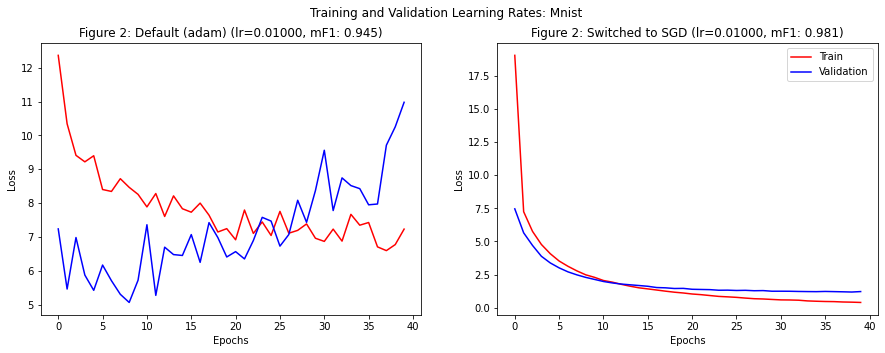

In [6]:
# plot the results
facade.result_manager.get_grapher().plot([default_res, with_sgd_res])